In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [4]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
#info shows that the dataset is clean, that the all continuous columns are completely float64
#categorical columns exactly 116 in number are all object
#the one id column is completely int64
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
train.iloc[:,117]

0         0.726300
1         0.330514
2         0.261841
3         0.321594
4         0.273204
5         0.546670
6         0.471447
7         0.826591
8         0.330514
9         0.726300
10        0.496063
11        0.520698
12        0.321594
13        0.351358
14        0.894333
15        0.472892
16        0.424162
17        0.834747
18        0.488816
19        0.391956
20        0.338258
21        0.283689
22        0.125526
23        0.475784
24        0.378225
25        0.573810
26        0.296829
27        0.475784
28        0.645422
29        0.477231
            ...   
188288    0.638758
188289    0.642763
188290    0.642763
188291    0.644094
188292    0.514906
188293    0.894333
188294    0.315300
188295    0.645422
188296    0.509110
188297    0.348719
188298    0.243238
188299    0.329232
188300    0.446969
188301    0.436958
188302    0.497513
188303    0.894333
188304    0.596331
188305    0.465671
188306    0.726300
188307    0.475784
188308    0.325401
188309    0.

In [8]:
#collecting the 14 cont column names and 116 cat column names
cols_cat = train.iloc[:,1:117].columns
cols_cont = train.iloc[:,117:131].columns

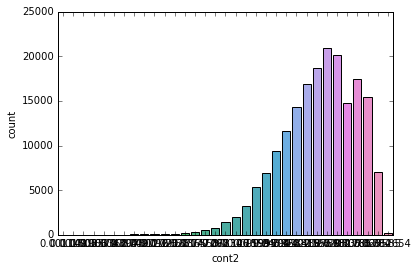

In [9]:
sns.countplot(x = cols_cont[1], data = train )

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



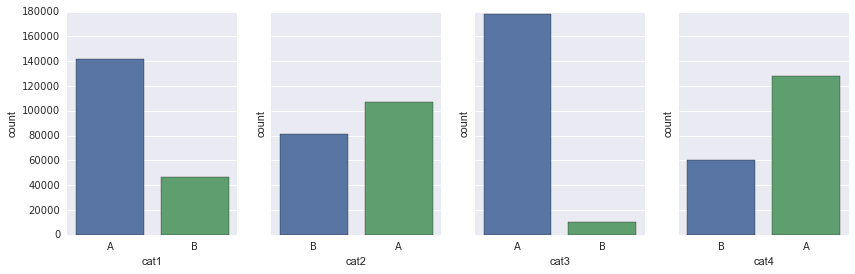

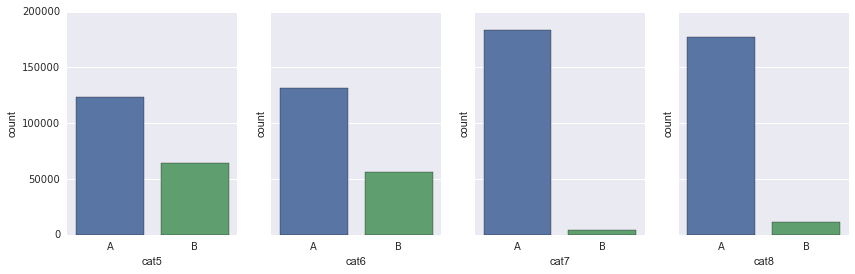

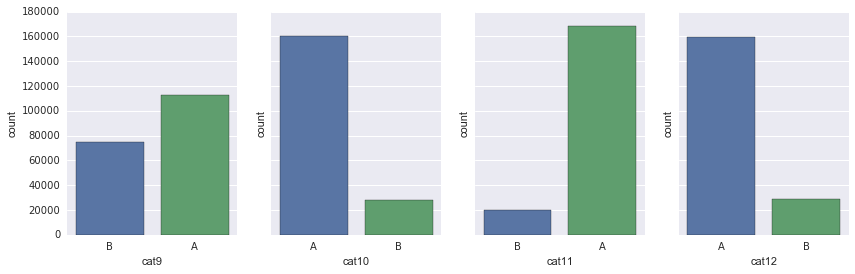

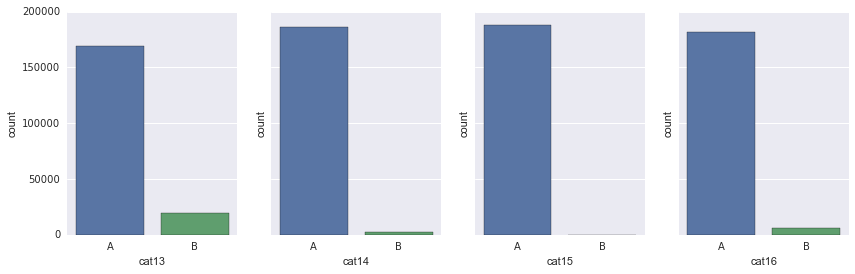

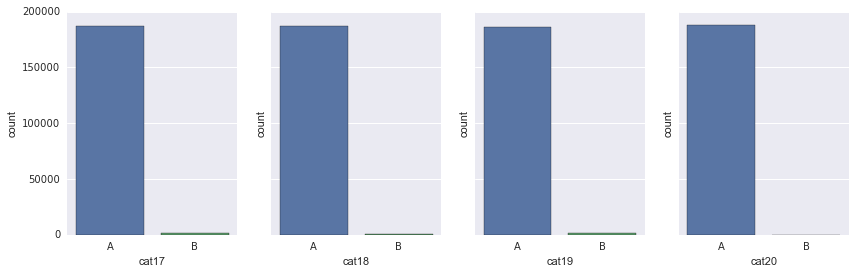

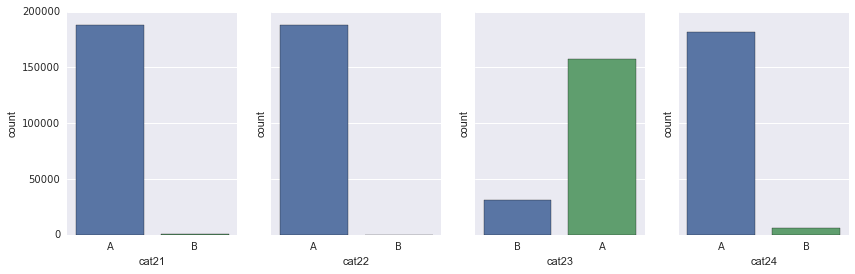

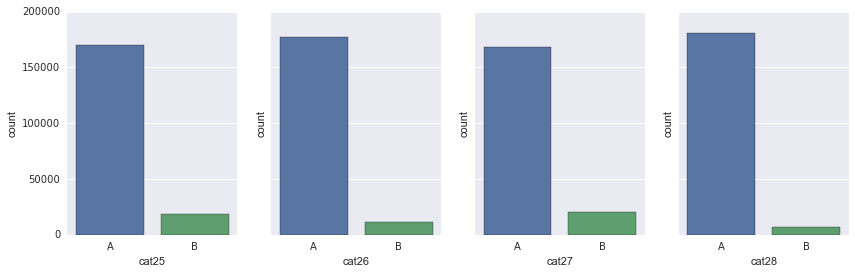

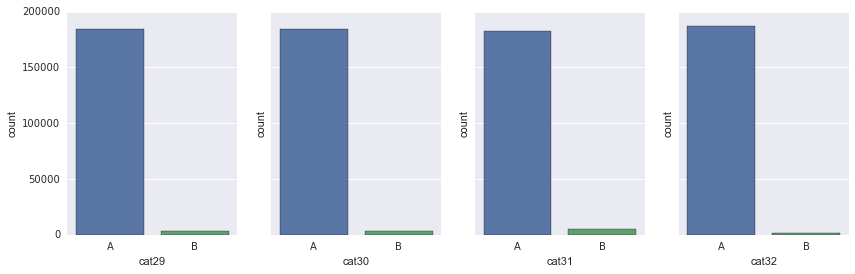

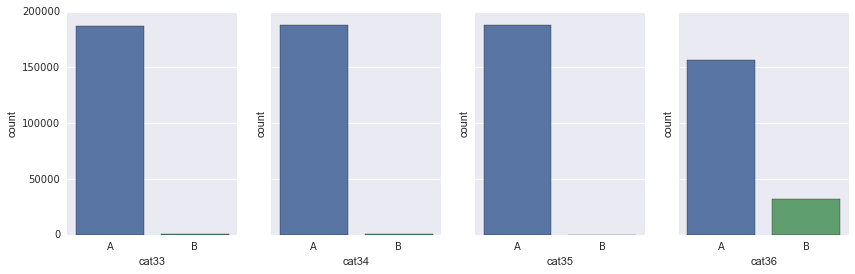

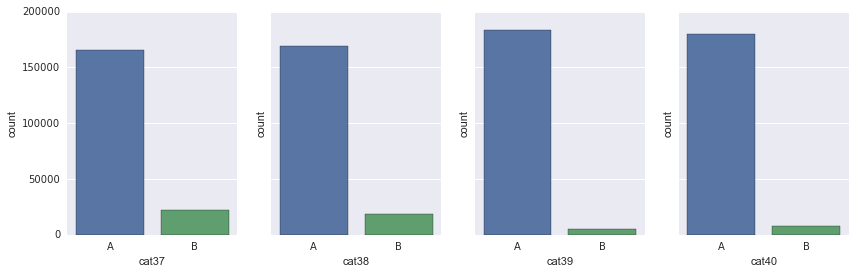

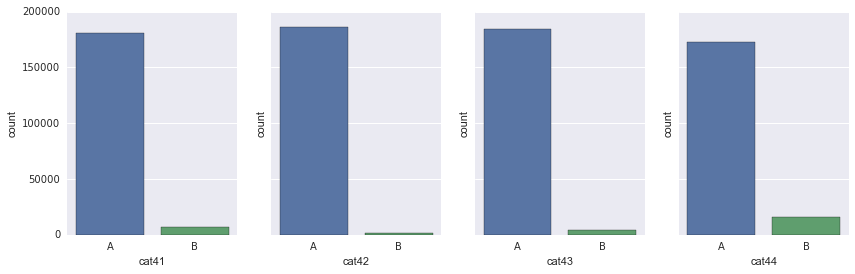

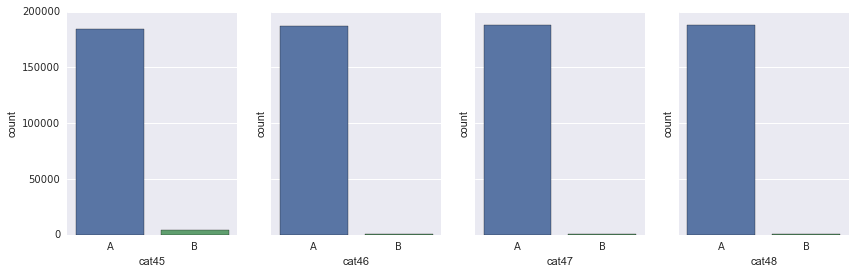

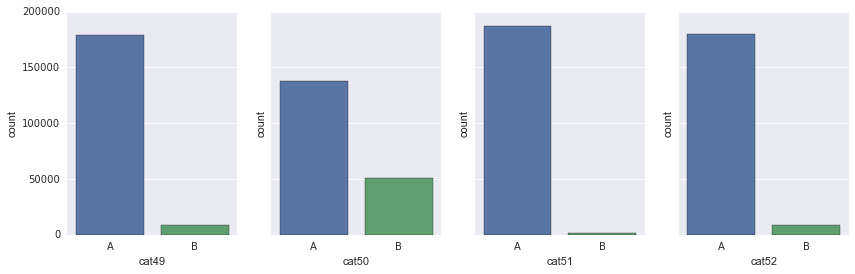

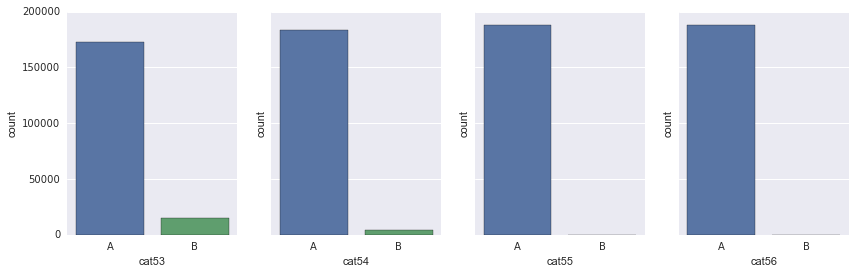

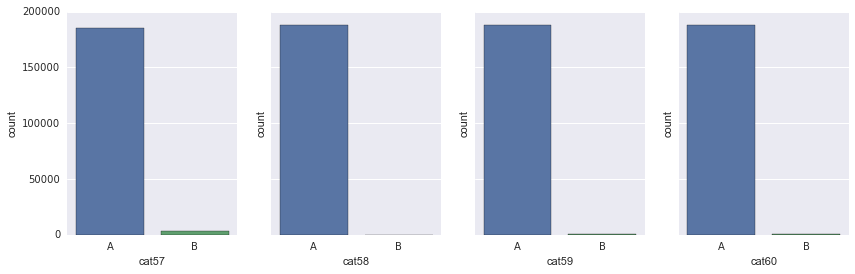

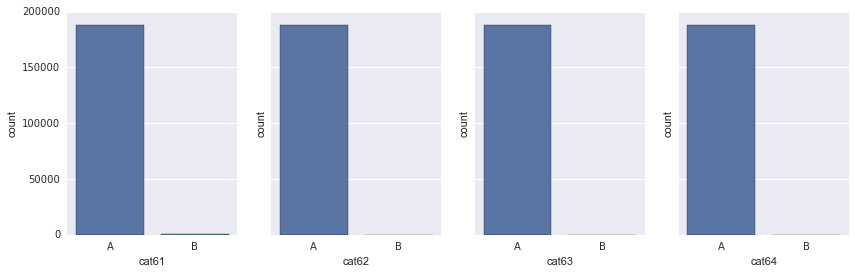

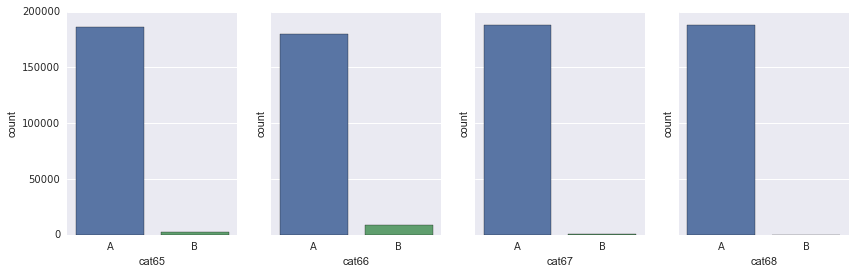

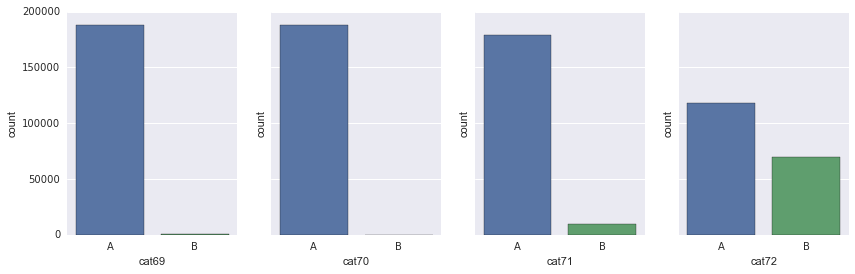

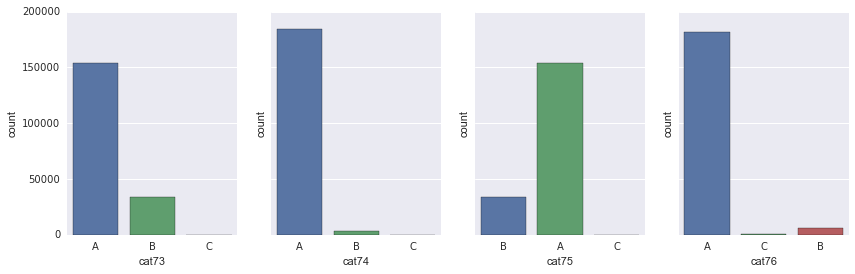

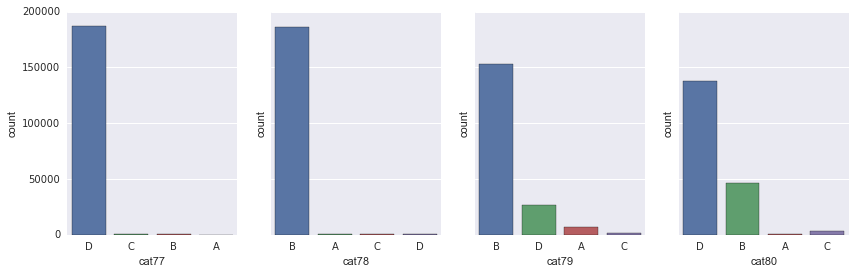

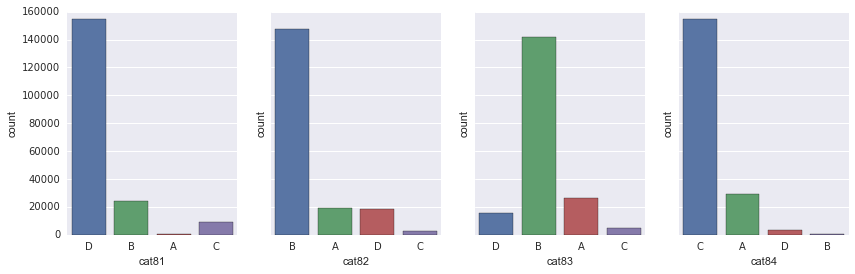

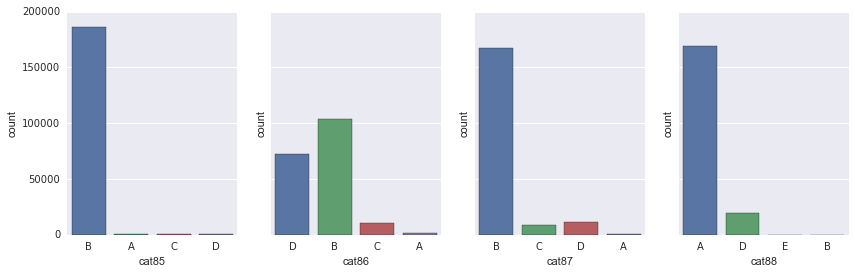

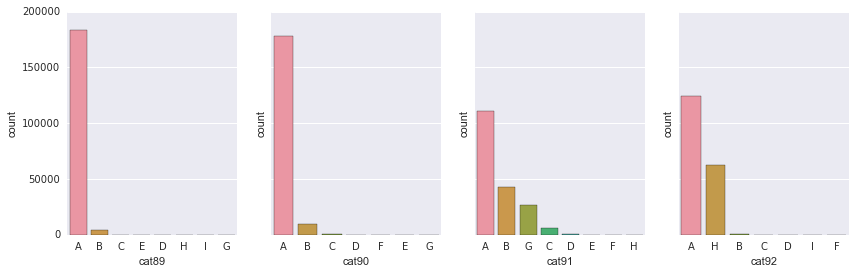

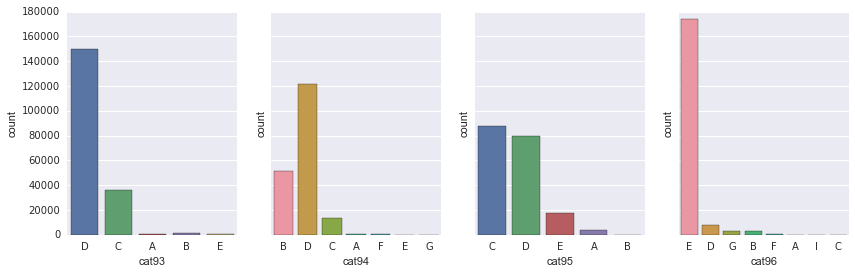

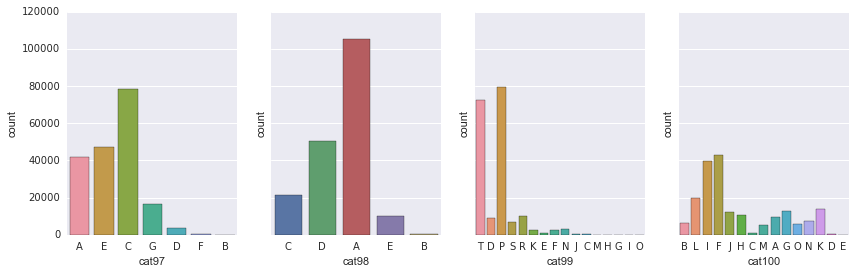

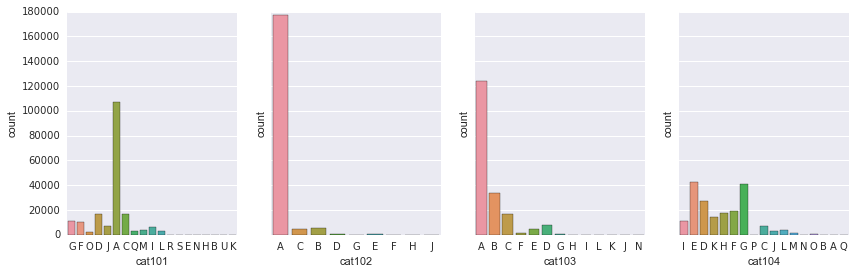

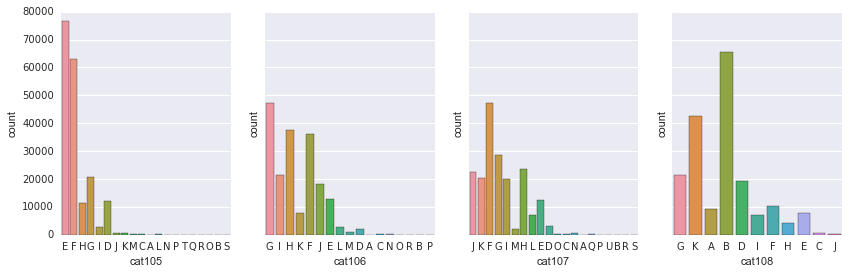

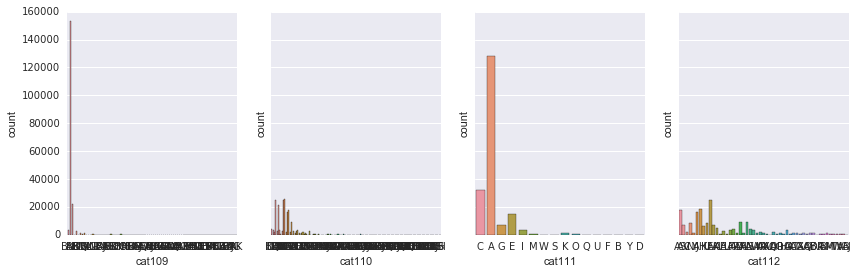

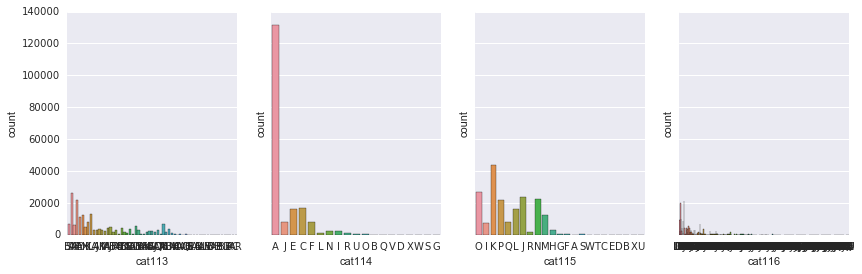

In [10]:
#making a 29x4 grid of countplots
sns.set(style="darkgrid")
for i in range(29):
    fig, ax = plt.subplots(ncols = 4, nrows = 1, sharey = 'row', sharex = 'col', figsize = (14,4))
    for j in range(4):
        sns.countplot(x = cols_cat[i*4+j], data = train, ax = ax[j])

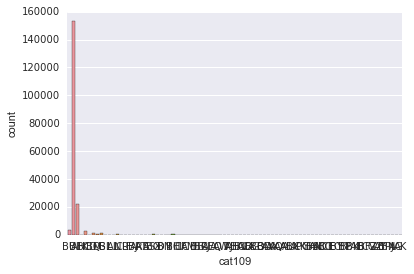

In [11]:
sns.countplot(x = 'cat109', data = train)

This doesn't give us much, since there are a lot of unique categorical values. Lets look at cat109 more carefully
Plotting it against loss 

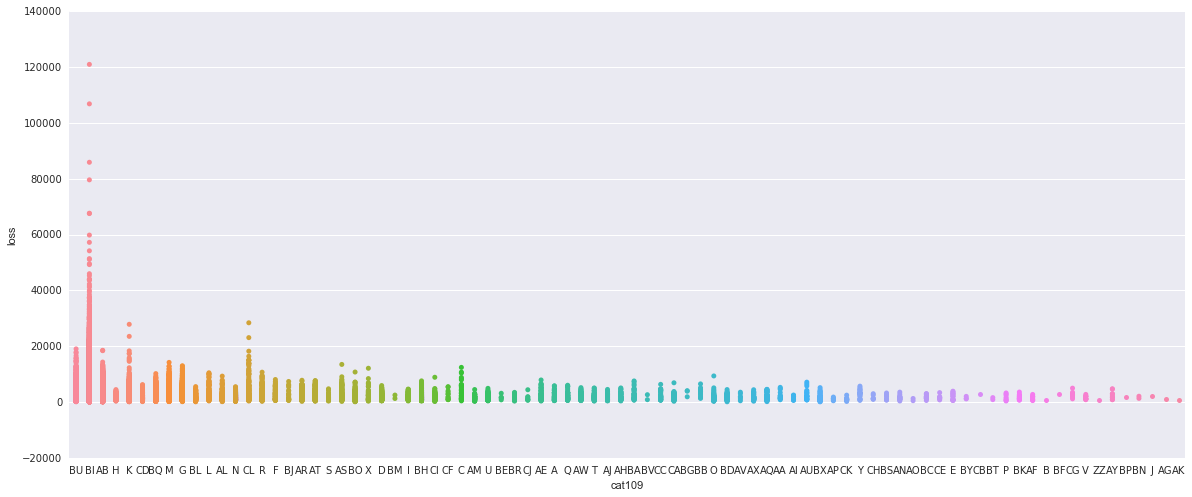

In [12]:
sns.color_palette("Blues", 3)
figc109, ax = plt.subplots(figsize = (20,8))
sns.set_context("notebook", rc={"labelsize": 1.5})
sns.stripplot(x = 'cat109', y = 'loss', data = train)

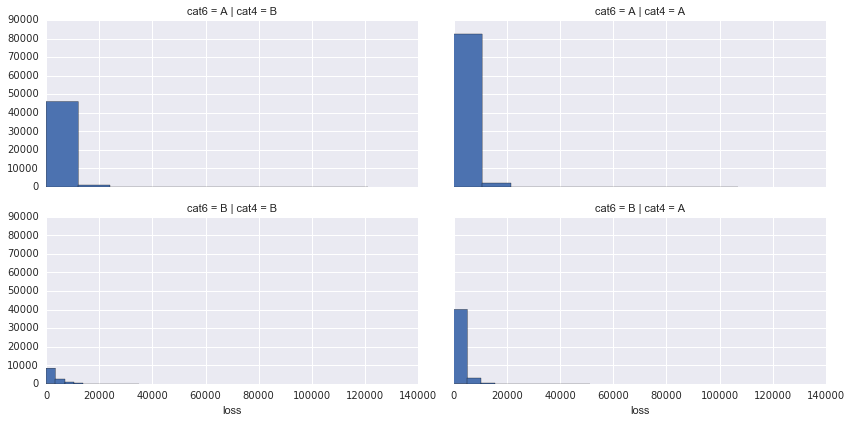

In [14]:
#cat4, cat5, cat 6, cat 9 seems to have similar proportion of A and B counts from the previous count plots 
#lets check some cross grids
#cat4 and cat 5
g = sns.FacetGrid(train, col="cat4",  row="cat6", aspect = 2)
g = g.map(plt.hist, "loss")

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



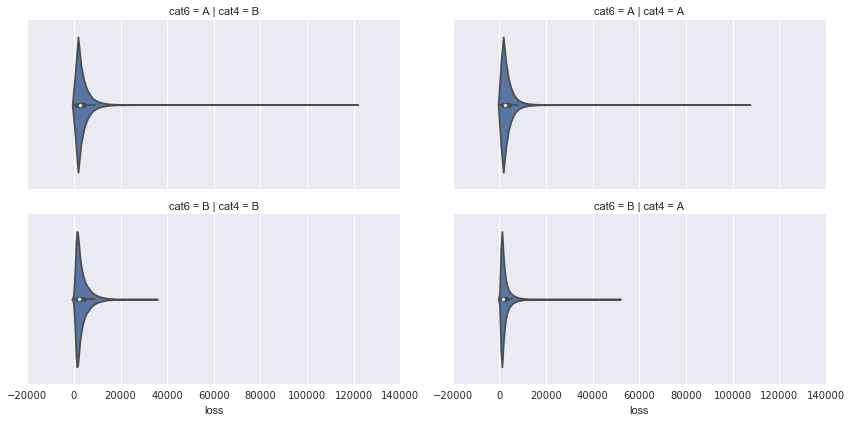

In [15]:
#cat83 and cat82 have similar counts of labels
g = sns.FacetGrid(train, col="cat4",  row="cat6", aspect = 2)
g = g.map(sns.violinplot, "loss")

In [16]:
#so there are 14 continuous features, 1 loss, 1 id and 116 categorical features
#lets check the skew
train.skew()

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

loss has a pretty significant skew

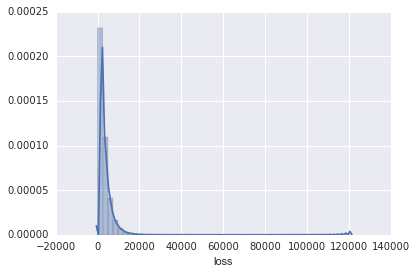

In [17]:
skew_loss = sns.distplot(train['loss'])

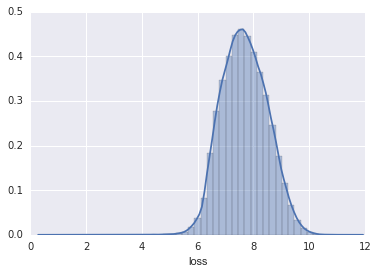

In [18]:
skew_loss_log1p = sns.distplot(np.log1p(train['loss']))

In [19]:
#skew seems to be corrected when log1p is applied.

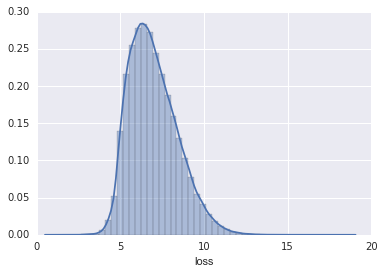

In [20]:
#this is another good way
skew_loss_power = sns.distplot(np.power(train['loss'], 1/4))

In [21]:
#as for cont features, I could plot all distribution plots and correlation plots among them but that will be waste of memory,
#so I will see it for some

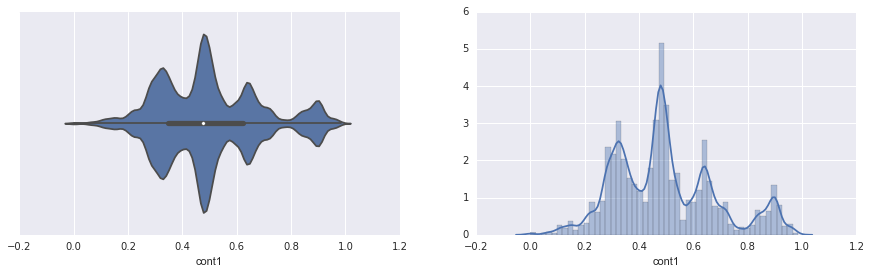

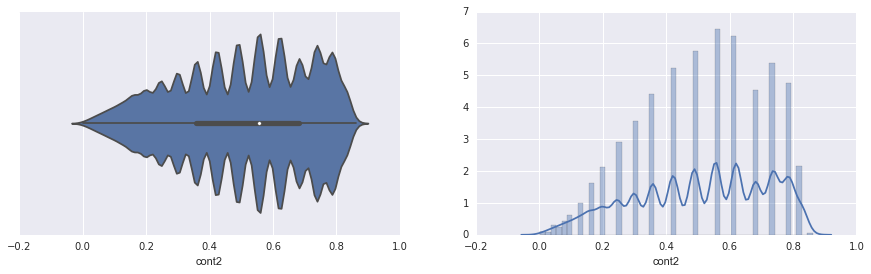

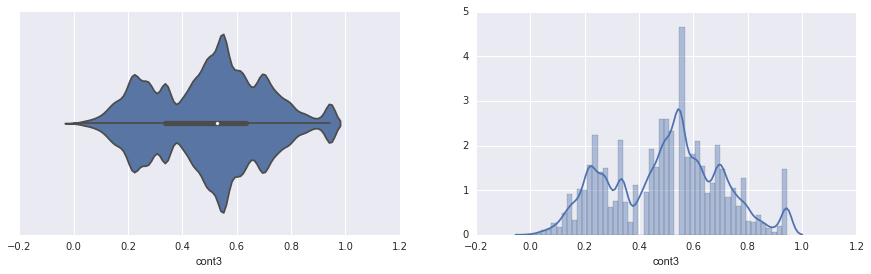

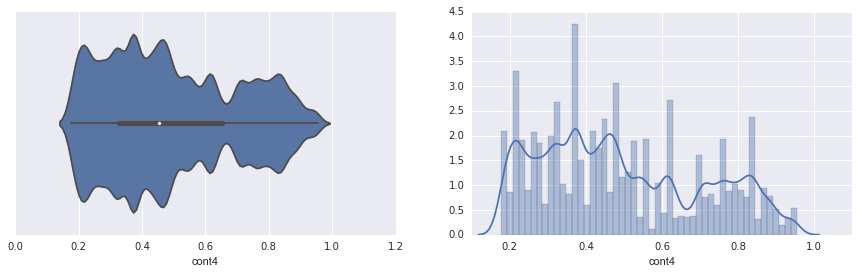

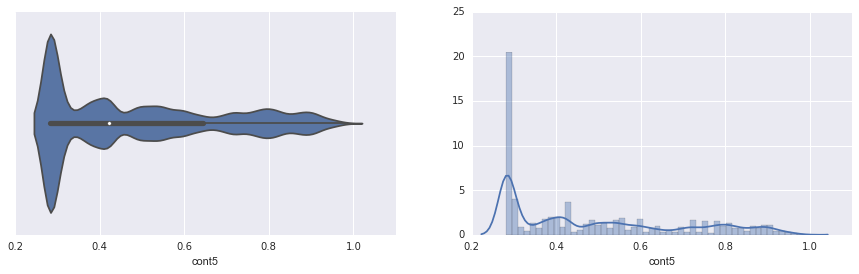

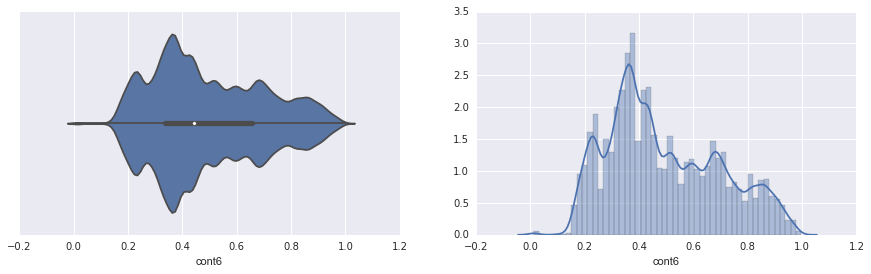

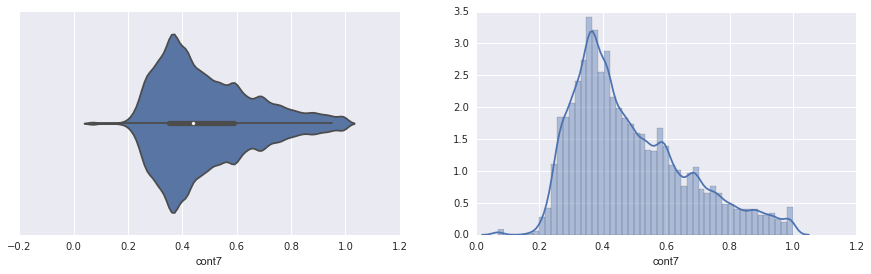

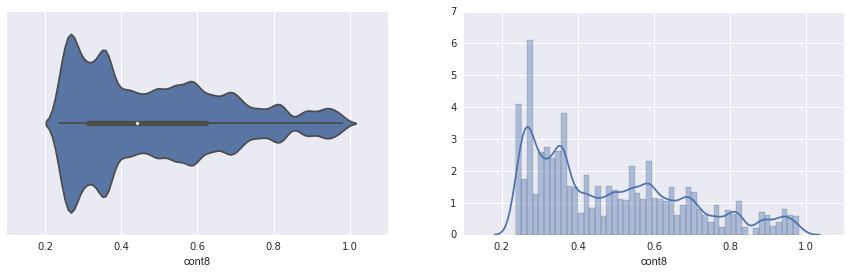

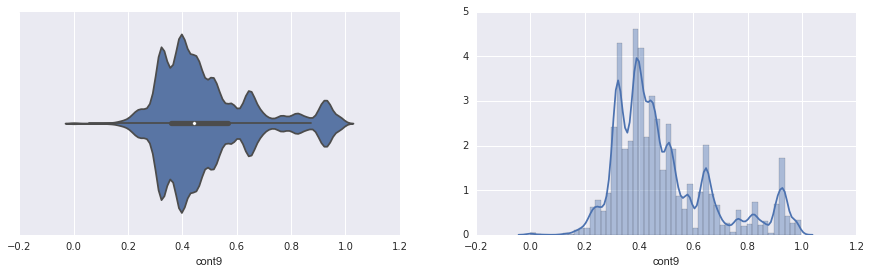

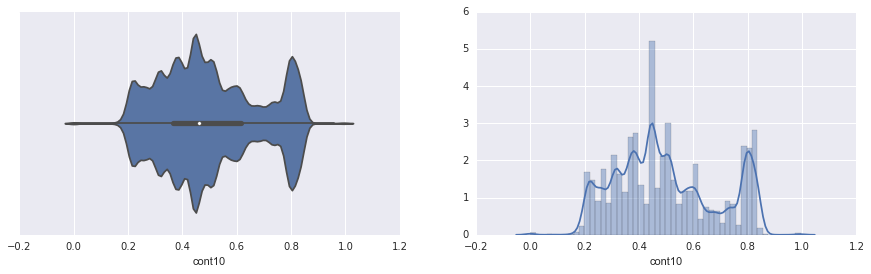

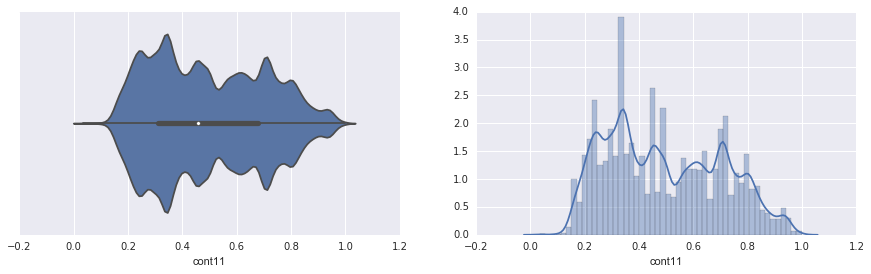

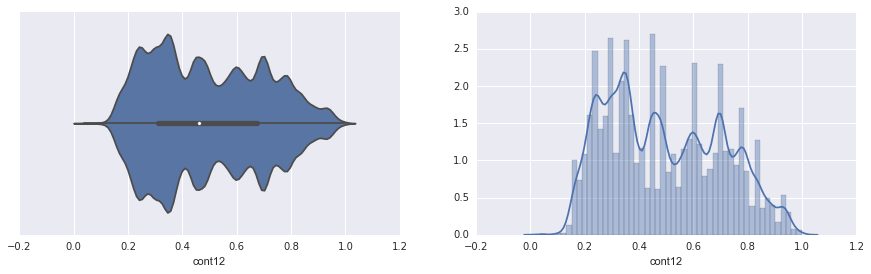

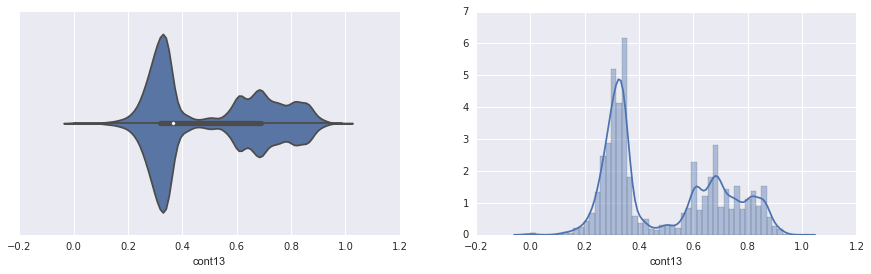

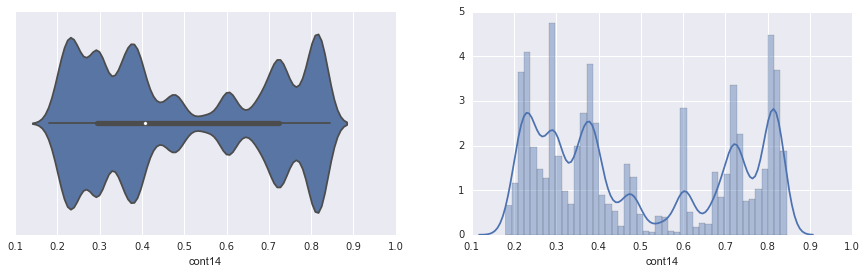

In [22]:
for i in range(14):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
    for j in range(1):
        v = sns.violinplot(data = train, x = cols_cont[i], ax = ax[j])
        d = sns.distplot(train[cols_cont[i]], ax = ax[j+1])

In [23]:
#the violinplots and distribution plots are basically similar since both check the frequency or distribution of the values
#But cont2 reveals an interesting discrete distribution plot. The bins turned out to be too small in this case.
#cont3 also reveals some missing points
#cont5 has most of data in the first bin itself

In [24]:
#for pairwise correlation plots , I shall try to plot for the most correlated and the least correlated features

In [25]:
#pairwise pearson co-efficient
corr = train.corr()

In [26]:
corr

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,1.000000,0.002130,0.000783,0.000816,0.002578,0.000775,0.001426,0.002209,0.005534,0.001870,0.002582,0.001075,0.000889,0.000442,-0.004924,-0.001122
cont1,0.002130,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,0.000783,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,0.000816,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.002578,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,0.000775,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355
cont6,0.001426,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967
cont7,0.002209,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799
cont8,0.005534,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508
cont9,0.001870,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456


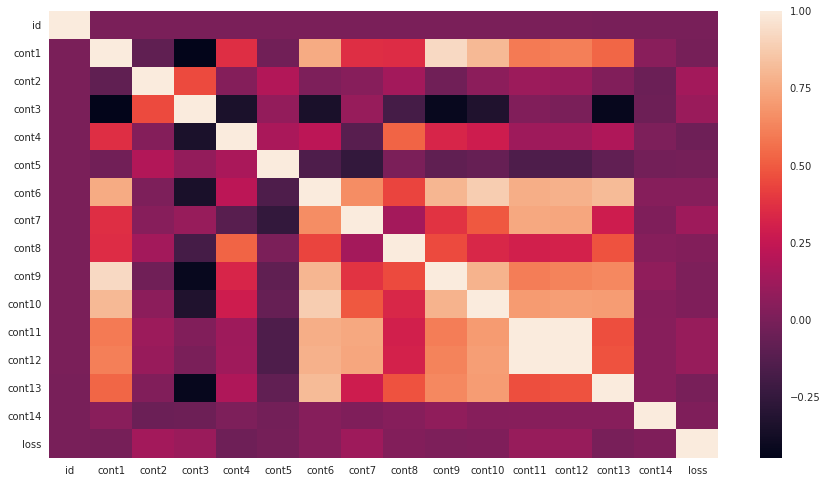

In [27]:
plt.figure(figsize=(15,8))
#making the size fit in my screen at once
sns.heatmap(corr)

In [28]:
#we see that apart from loss and id (for obvious reasons), cont2, cont3, cont5 and cont14 in general have low correlations

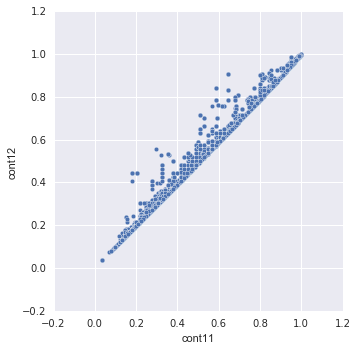

In [29]:
#cont11 and cont12 have extremely high correlation
sns.pairplot(train, x_vars='cont11', y_vars='cont12', size = 5)

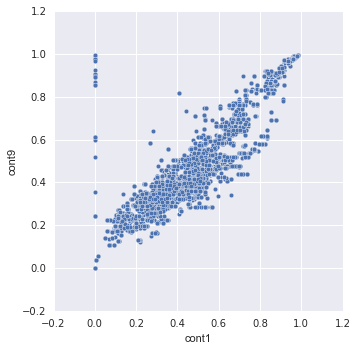

In [30]:
#the cont11 and cont12 correlation is so high that they almost lie in the straight line. 
#One of them can be dropped or they can be combined to get better results and reduce curse of dimensionality during modelling
#cont1 and cont9 has a high correlation too
sns.pairplot(train, x_vars='cont1', y_vars='cont9', size = 5)

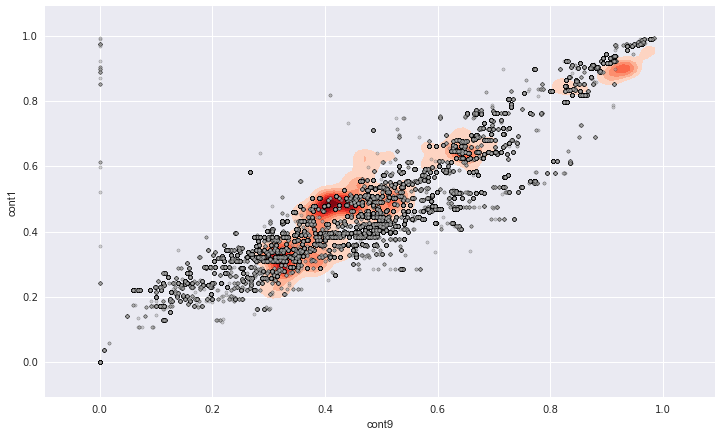

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(train['cont9'], train['cont1'], kernel='gau', bw='scott',
                 cmap="Reds", shade=True, shade_lowest=False, ax = ax)
ax.scatter(train['cont1'],train['cont9'], s=10, c='darkgrey', marker='o', alpha=0.5)
plt.show()

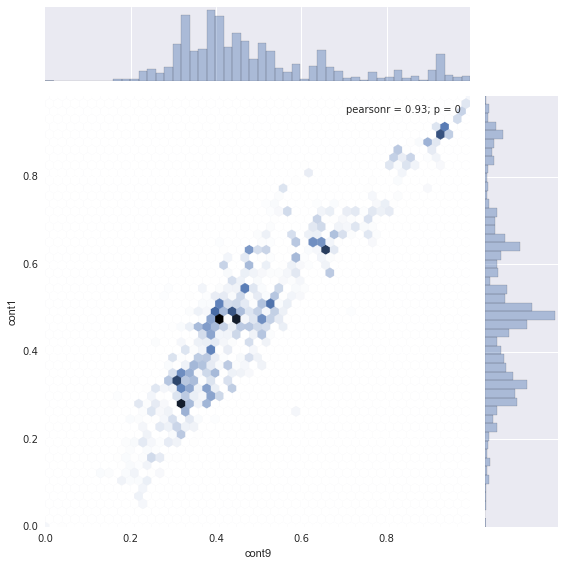

In [32]:
#another way of visualizing the distribution is jointplot
sns.jointplot('cont9', 'cont1', data=train, kind='hex', size = 8)

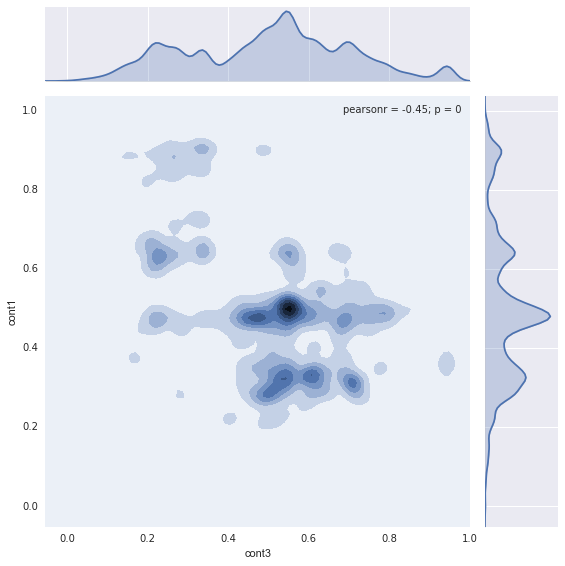

In [33]:
#the cont1 and cont3 seems to have the lowest correlation from the heatmap
sns.jointplot('cont3', 'cont1', data=train, kind='kde', size = 8)

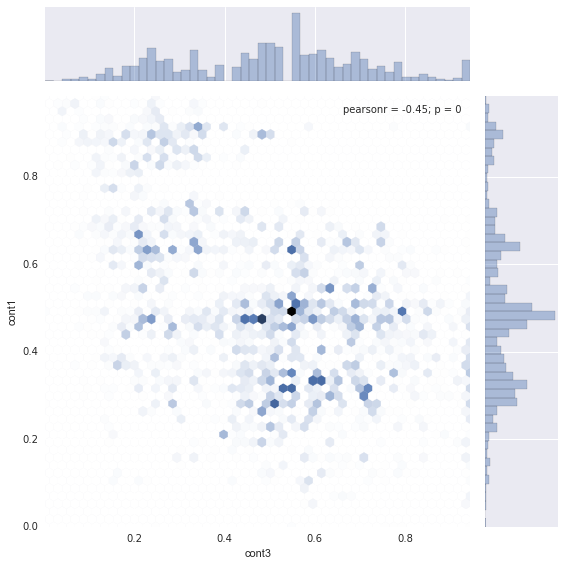

In [34]:
sns.jointplot('cont3', 'cont1', data=train, kind='hex', size = 8)

### Modelling

The issue here is the large number of categorical values. Some of them have only two unique values (A or B) which is fine but some have a lot more.

In [35]:
#just a check
cols_cat[71]

'cat72'

In [36]:
#first make the binary cat columns into 0 and 1
#first 72 cat columns have only 'A' or 'B' . Let us put 1 for A and 0 for B
for i in range(71):
    train[cols_cat[i]] = np.where(train[cols_cat[i]]=='A',1,0)

In [37]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,1,0,1,0,1,1,1,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,1,0,1,1,1,1,1,1,0,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,1,0,1,1,0,1,1,1,0,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,0,0,1,0,1,1,1,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,1,0,1,0,1,1,1,1,0,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [38]:
for i in range(71):
    test[cols_cat[i]] = np.where(test[cols_cat[i]]=='A',1,0)

In [39]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,1,0,1,1,1,1,1,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,1,0,1,0,1,1,1,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,1,0,1,0,0,1,0,1,0,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,1,1,1,1,0,1,1,1,1,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,0,1,1,1,1,0,1,1,1,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [40]:
#store the loss label into another target so that we can make both test and train of same dimensions
target = pd.DataFrame()
target['loss'] = train['loss']

In [41]:
#drop the loss column
train = train.drop('loss', axis=1)

In [42]:
target.head()

,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85


In [43]:
#since it's only going to get uglier, I will combine test and train for these steps
combined = train.append(test)

In [44]:
combined.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,1,0,1,0,1,1,1,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,1,0,1,1,1,1,1,1,0,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,1,0,1,1,0,1,1,1,0,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,0,0,1,0,1,1,1,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,1,0,1,0,1,1,1,1,0,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [46]:
#dummy encoding all categorical values
for i in range(44):
    dummies1 = pd.get_dummies(combined[cols_cat[i+71]], prefix=cols_cat[i+72])
    combined = pd.concat([combined,dummies1], axis=1)
    combined = combined.drop(cols_cat[i+71], axis=1)

KeyError: 'cat72'

In [49]:
pd.options.display.max_columns = 200

In [52]:
combined.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat73_A,cat73_B,cat74_A,cat74_B,cat74_C,cat75_A,cat75_B,cat75_C,cat76_A,cat76_B,cat76_C,cat77_A,cat77_B,cat77_C,...,cat114_AE,cat114_AF,cat114_AG,cat114_AH,cat114_AI,cat114_AJ,cat114_AK,cat114_AL,cat114_AM,cat114_AN,cat114_AO,cat114_AP,cat114_AQ,cat114_AR,cat114_AS,cat114_AT,cat114_AU,cat114_AV,cat114_AW,cat114_AX,cat114_AY,cat114_B,cat114_BA,cat114_BB,cat114_BC,cat114_BD,cat114_BE,cat114_BF,cat114_BG,cat114_BH,cat114_BI,cat114_BJ,cat114_BK,cat114_BL,cat114_BM,cat114_BN,cat114_BO,cat114_C,cat114_E,cat114_F,cat114_G,cat114_H,cat114_I,cat114_J,cat114_K,cat114_L,cat114_M,cat114_N,cat114_O,cat114_P,cat114_Q,cat114_R,cat114_S,cat114_T,cat114_U,cat114_V,cat114_X,cat114_Y,cat115_A,cat115_B,cat115_C,cat115_D,cat115_E,cat115_F,cat115_G,cat115_I,cat115_J,cat115_L,cat115_N,cat115_O,cat115_Q,cat115_R,cat115_S,cat115_U,cat115_V,cat115_W,cat115_X,cat116_A,cat116_B,cat116_C,cat116_D,cat116_E,cat116_F,cat116_G,cat116_H,cat116_I,cat116_J,cat116_K,cat116_L,cat116_M,cat116_N,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_W,cat116_X
0,1,1,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,1,0,1,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,1,0,0,1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,11,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,0,1,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [51]:
#looks like I missed one column, no issue
combined = combined.drop(cols_cat[115], axis=1)

In [53]:
#817 columns is very big and deleting one dummy variable per encoding to prevent dummy variable trap is not nearly enough
#instead I will try to look at feature importances, this is a regression problem so lets first try random forest regressor
#split train and test back, first 188318 rows are the training set
train = combined.iloc[:188318]
test = combined.iloc[188318:]

In [54]:
train.info()
test.info()
#we see there are no discrepencies left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 0 to 188317
Columns: 771 entries, id to cat116_X
dtypes: float64(14), int32(71), int64(1), uint8(685)
memory usage: 197.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125546 entries, 0 to 125545
Columns: 771 entries, id to cat116_X
dtypes: float64(14), int32(71), int64(1), uint8(685)
memory usage: 131.3 MB


In [55]:
#I plan to determine the feature importances of the dummies created and handle the cont features manually or otherwise
train_cat = train.iloc[:,1:72]
train_cat2 = train.iloc[:,86:]

In [56]:
#pd.options.display.max_columns = 20
train_cat = pd.concat([train_cat, train_cat2], axis=1)

In [57]:
train_cat.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat73_A,cat73_B,cat74_A,cat74_B,cat74_C,cat75_A,cat75_B,cat75_C,cat76_A,cat76_B,cat76_C,cat77_A,cat77_B,cat77_C,cat78_A,cat78_B,cat78_C,cat78_D,cat79_A,cat79_B,cat79_C,cat79_D,cat80_A,cat80_B,cat80_C,cat80_D,cat81_A,cat81_B,cat81_C,...,cat114_AE,cat114_AF,cat114_AG,cat114_AH,cat114_AI,cat114_AJ,cat114_AK,cat114_AL,cat114_AM,cat114_AN,cat114_AO,cat114_AP,cat114_AQ,cat114_AR,cat114_AS,cat114_AT,cat114_AU,cat114_AV,cat114_AW,cat114_AX,cat114_AY,cat114_B,cat114_BA,cat114_BB,cat114_BC,cat114_BD,cat114_BE,cat114_BF,cat114_BG,cat114_BH,cat114_BI,cat114_BJ,cat114_BK,cat114_BL,cat114_BM,cat114_BN,cat114_BO,cat114_C,cat114_E,cat114_F,cat114_G,cat114_H,cat114_I,cat114_J,cat114_K,cat114_L,cat114_M,cat114_N,cat114_O,cat114_P,cat114_Q,cat114_R,cat114_S,cat114_T,cat114_U,cat114_V,cat114_X,cat114_Y,cat115_A,cat115_B,cat115_C,cat115_D,cat115_E,cat115_F,cat115_G,cat115_I,cat115_J,cat115_L,cat115_N,cat115_O,cat115_Q,cat115_R,cat115_S,cat115_U,cat115_V,cat115_W,cat115_X,cat116_A,cat116_B,cat116_C,cat116_D,cat116_E,cat116_F,cat116_G,cat116_H,cat116_I,cat116_J,cat116_K,cat116_L,cat116_M,cat116_N,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_W,cat116_X
0,1,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#I plan to determine the feature importances of the dummies created and handle the cont features manually or otherwise
#I realize my RAM is far too less to handle these, even deleting unnecessary variables didn't help. 
#So I am going to stick to vizualization here and meanwhile find ways to work around this, this problem is common

# Conclusions:
This is a basic visualisation of the Allstate dataset provided. Further I'd like to explore interactive plotting libraries like plotly, bokeh or softwares like Tableau. Also if possible, try doing some exploration of the features and attempt to decode the anonymity, we can use external data if the features were not so anonymous.

In the modeling part, I have barely scratched the surface. I wish to apply powerful algorithms like xgboost and try the stacking method with neural networks.
